<a href="https://colab.research.google.com/github/GuDevi/Titanic-Survival-Prediction-Task-2/blob/main/Titanic_Classification_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train=pd.read_csv('/content/Titanic-Dataset.csv')
test=pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.shape

(891, 12)

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<ipython-input-60-80b92a2585ac>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar',


<Axes: xlabel='Sex'>

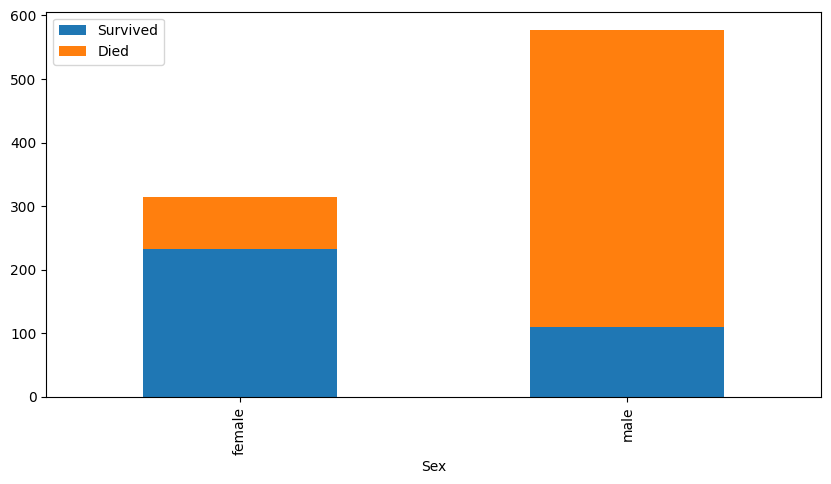

In [ ]:
train['Died'] = 1 - train['Survived']
train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar',
                                                           figsize=(20, 5),
                                                           stacked=True)

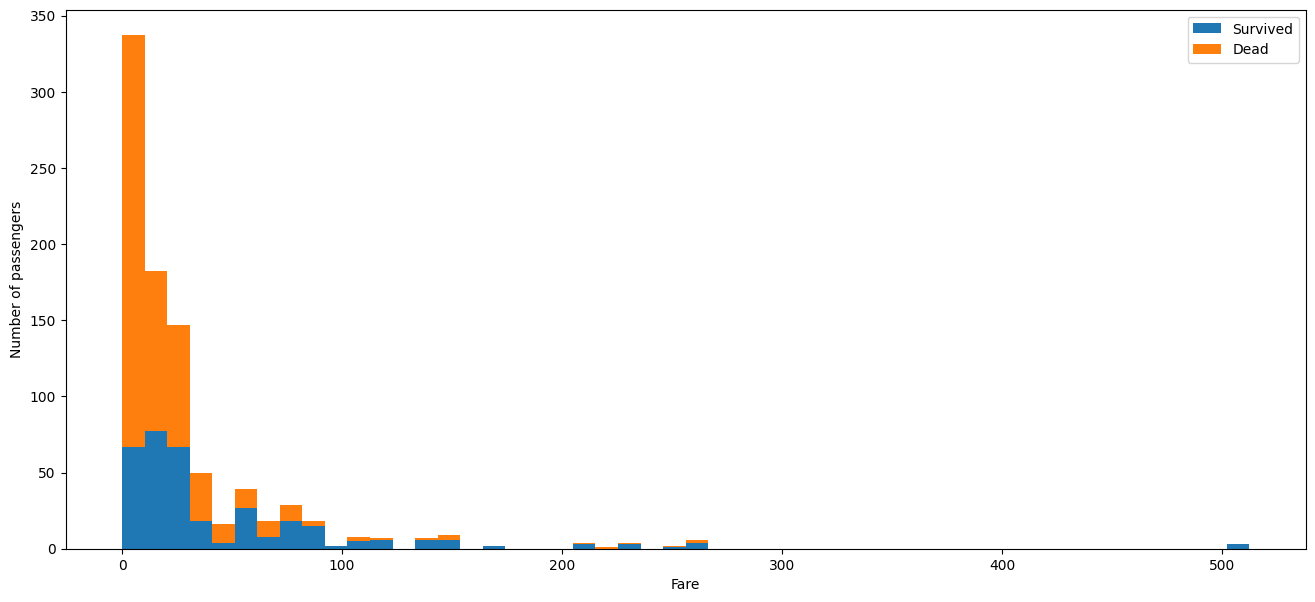

In [ ]:
figure = plt.figure(figsize=(16, 7))
plt.hist([train[train['Survived'] == 1]['Fare'], train[train['Survived'] == 0]['Fare']],
         stacked=True, bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

In [ ]:
df1=train.drop(['Name','Ticket','Cabin','PassengerId','Died'], axis=1)
df1.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [ ]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
df1.Sex=df1.Sex.map({'female':0, 'male':1})
df1.Embarked=df1.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'NaN'})
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [ ]:
mean_age_men=df1[df1['Sex']==1]['Age'].mean()
mean_age_women=df1[df1['Sex']==0]['Age'].mean()

In [ ]:
df1.loc[(df1.Age.isnull()) & (df1['Sex']==0),'Age']=mean_age_women
df1.loc[(df1.Age.isnull()) & (df1['Sex']==1),'Age']=mean_age_men

In [ ]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [ ]:
df1.dropna(inplace=True)

In [ ]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df1.Age = (df1.Age-min(df1.Age))/(max(df1.Age)-min(df1.Age))
df1.Fare = (df1.Fare-min(df1.Fare))/(max(df1.Fare)-min(df1.Fare))
df1.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,0.367812,0.524184,0.382452,0.062649
std,0.486260,0.834700,0.477538,0.163124,1.103705,0.806761,0.097003
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.271174,0.000000,0.000000,0.015412
50%,0.000000,3.000000,1.000000,0.371701,0.000000,0.000000,0.028213
75%,1.000000,3.000000,1.000000,0.434531,1.000000,0.000000,0.060508
max,1.000000,3.000000,1.000000,1.000000,8.000000,6.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df1.drop(['Survived'], axis=1),
    df1.Survived,
    test_size= 0.2,
    random_state=0,
    stratify=df1.Survived)

In [ ]:
from sklearn.linear_model import LogisticRegression
lrmod = LogisticRegression()
lrmod.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_predict = lrmod.predict(X_test)
accuracy_score(y_test, y_predict)

0.8426966292134831

<Axes: >

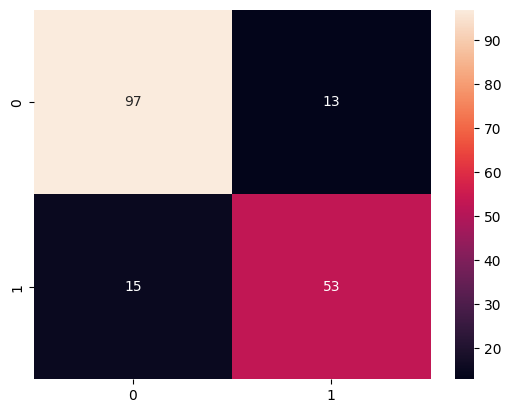

In [ ]:
from sklearn.metrics import confusion_matrix
cma=confusion_matrix(y_test, y_predict)
sns.heatmap(cma,annot=True)

In [ ]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df2=test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
df2.Sex=df2.Sex.map({'female':0, 'male':1})
df2.Embarked=df2.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'NaN'})
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [ ]:
df2.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
mean_age_men2=df2[df2['Sex']==1]['Age'].mean()
mean_age_women2=df2[df2['Sex']==0]['Age'].mean()

In [ ]:
df2.loc[(df2.Age.isnull()) & (df2['Sex']==0),'Age']=mean_age_women2
df2.loc[(df2.Age.isnull()) & (df2['Sex']==1),'Age']=mean_age_men2
df2['Fare']=df2['Fare'].fillna(df2['Fare'].mean())

In [ ]:
df2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [ ]:
df2.Age = (df2.Age-min(df2.Age))/(max(df2.Age)-min(df2.Age))
df2.Fare = (df2.Fare-min(df2.Fare))/(max(df2.Fare)-min(df2.Fare))
df2.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,0.368384,0.523008,0.381594,0.062858
std,0.486592,0.836071,0.477990,0.163545,1.102743,0.806057,0.096995
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.271174,0.000000,0.000000,0.015440
50%,0.000000,3.000000,1.000000,0.371701,0.000000,0.000000,0.028213
75%,1.000000,3.000000,1.000000,0.434531,1.000000,0.000000,0.060508
max,1.000000,3.000000,1.000000,1.000000,8.000000,6.000000,1.000000


In [ ]:
features_used = lrmod.coef_.shape[1]
print(f"Features used during training: {features_used}")
print(f"Features in df2: {df2.columns}")


Features used during training: 7
Features in df2: Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [ ]:
prediction_df = pd.read_csv('submission.csv')

In [ ]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],
                            "Survived": prediction})
submission.to_csv('submission.csv', index=False)

In [ ]:
prediction_df = pd.read_csv('submission.csv')

<Axes: xlabel='Survived', ylabel='count'>

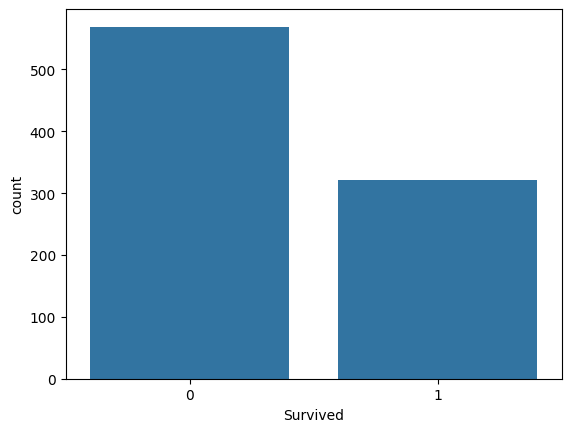

In [ ]:
sns.countplot(x='Survived', data=prediction_df)